### 목표
 - 0~9까지의 손글씨 이미지 데이터를 분류하는 모델을 만들어보자!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# keras에서 지원하는 딥러닝 학습용 손글씨 데이터 임포트
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data()

In [3]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(data)

2

In [5]:
print(len(data[0]))      # train
print(len(data[1]))      # test

print(len(data[0][0]))   # X_train
print(len(data[0][1]))   # y_train
print(len(data[1][0]))   # X_test
print(len(data[1][1]))   # y_test

2
2
60000
60000
10000
10000


In [6]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# (데이터의개수, 가로픽셀 수, 세로픽셀 수)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

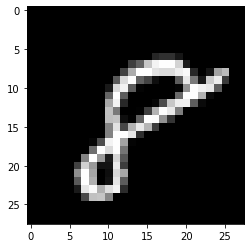

In [9]:
plt.imshow(X_train[59999], cmap='gray');

# imshow : 이미지 데이터를 그림으로 출력해주는 명령
# cmap='gray' : 이미지를 흑백으로 전환시켜주는 명령

### 정답 데이터를 원핫인코딩 하는 이유
- 신경망 출력층에서 각 레이블 값들에 대한 확률 정보와 비교하여 오차를 구하기 위해서
- 신경망 내부의 기본 모델이 선형회귀 모델이고 선형회귀 모델에서는 최적의 w,b값을 구하기 위해 오차를 점점 줄여나가야 하기 때문에! 결국 딥러닝도 같은 방식으로 동작함!!

In [10]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [11]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

In [12]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- 신경망에는 2차원인 이미지 데이터를 한번에 넣을수가 없기 때문에 데이터의 차원을 1차원으로 펴주는 작업이 필요함

In [14]:
# -1의 의미는 60000을 제외한 나머지값들을 다 곱해줌
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [15]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### 신경망 구조를 직접 설계해보자~!
- 입력되는 특성의 수
- 출력층의 뉴런수, 활성화함수
- 손실함수

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# 1. 신경망 구조 설계
model = Sequential()

model.add(Dense(1000, input_dim=784, activation='relu'))

# 중간층(은닉층)
model.add(Dense(500, activation='relu'))   
model.add(Dense(100, activation='relu'))    

# 출력층
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 1,336,610
Trainable params: 1,336,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 2. 학습/평가방법 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',       
              metrics=['acc']        
             )

In [19]:
# 3. 학습
h = model.fit(X_train, y_train_one_hot,
              epochs=30,
              batch_size=256
             )

Epoch 1/30
235/235 [==============================] - 3s 15ms/step - loss: 2.5654 - acc: 0.8562
Epoch 2/30
235/235 [==============================] - 3s 15ms/step - loss: 0.2187 - acc: 0.9432
Epoch 3/30
235/235 [==============================] - 4s 15ms/step - loss: 0.1283 - acc: 0.9645
Epoch 4/30
235/235 [==============================] - 4s 15ms/step - loss: 0.0910 - acc: 0.9740
Epoch 5/30
235/235 [==============================] - 3s 14ms/step - loss: 0.0699 - acc: 0.9794
Epoch 6/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0537 - acc: 0.9833
Epoch 7/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0442 - acc: 0.9859
Epoch 8/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0452 - acc: 0.9860
Epoch 9/30
235/235 [==============================] - 3s 12ms/step - loss: 0.0421 - acc: 0.9872
Epoch 10/30
235/235 [==============================] - 3s 12ms/step - loss: 0.0341 - acc: 0.9900
Epoch 11/30
235/235 [==================

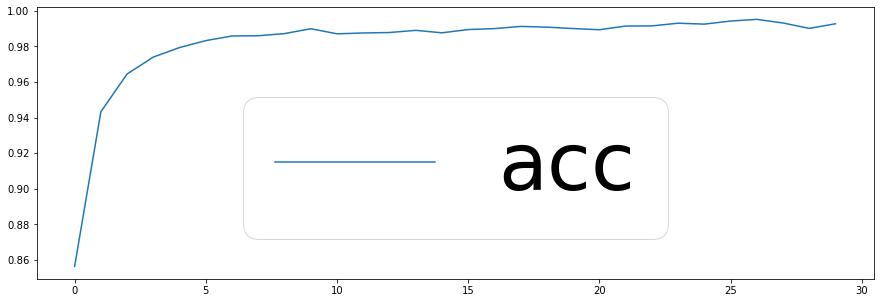

In [20]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')    

plt.legend(prop={'size':80}, loc='lower center')
plt.show()

In [21]:
# 4. 모델 평가
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.1366 - acc: 0.9769


[0.13662593066692352, 0.9768999814987183]

### 과대적합을 확인하기 위해 train데이터 셋에서 검증용 데이터셋을 분리해서 학습시 같이 출력시켜보자!

In [22]:
# 무조건 train, test 셋만 나눠주는게 아니라 데이터를 일정한 비율로 분리시켜주는 명령
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train,
                                                                  y_train_one_hot,
                                                                  random_state=3
                                                                 )

In [23]:
print(X_train.shape)
print(X_val.shape)             # 검증용 문제
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)     # 검증용 정답

(45000, 784)
(15000, 784)
(45000, 10)
(15000, 10)


In [25]:
# 1. 신경망 구조 설계
model1 = Sequential()

model1.add(Dense(1000, input_dim=784, activation='relu'))

# 중간층(은닉층)
model1.add(Dense(500, activation='relu'))   
model1.add(Dense(100, activation='relu'))    

# 출력층
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 1,336,610
Trainable params: 1,336,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 2. 학습/평가방법 설정
model1.compile(loss='categorical_crossentropy',
              optimizer='Adam',       
              metrics=['acc']        
             )

In [30]:
h1 = model1.fit(X_train, y_train_one_hot,
                epochs = 30,
                # 검증용 데이터셋 추가
                validation_data=(X_val, y_val_one_hot),
                batch_size=256
               )

Epoch 1/30
176/176 [==============================] - 3s 15ms/step - loss: 3.6993 - acc: 0.8459 - val_loss: 0.3634 - val_acc: 0.9195
Epoch 2/30
176/176 [==============================] - 3s 15ms/step - loss: 0.2273 - acc: 0.9417 - val_loss: 0.2928 - val_acc: 0.9371
Epoch 3/30
176/176 [==============================] - 3s 15ms/step - loss: 0.1346 - acc: 0.9630 - val_loss: 0.2423 - val_acc: 0.9463
Epoch 4/30
176/176 [==============================] - 3s 15ms/step - loss: 0.0998 - acc: 0.9720 - val_loss: 0.2349 - val_acc: 0.9461
Epoch 5/30
176/176 [==============================] - 3s 15ms/step - loss: 0.0683 - acc: 0.9805 - val_loss: 0.2140 - val_acc: 0.9529
Epoch 6/30
176/176 [==============================] - 3s 15ms/step - loss: 0.0482 - acc: 0.9848 - val_loss: 0.1970 - val_acc: 0.9584
Epoch 7/30
176/176 [==============================] - 3s 15ms/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.1928 - val_acc: 0.9623
Epoch 8/30
176/176 [==============================] - 3s 15ms/step - 

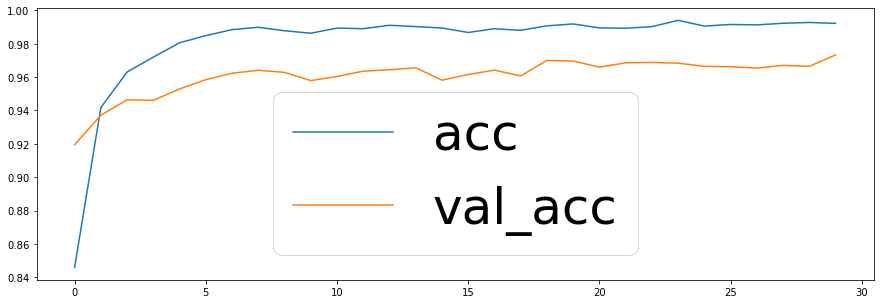

In [34]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h1.history['acc'], label='acc')  

plt.plot(h1.history['val_acc'], label='val_acc')    

plt.legend(prop={'size':50}, loc='lower center')
plt.show()

In [36]:
# 4. 모델 평가
model1.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 0s 2ms/step - loss: 0.1809 - acc: 0.9768


[0.18090374767780304, 0.9768000245094299]

# 